<a href="https://colab.research.google.com/github/mdepasquale1023/Rahway-Public-School-District/blob/main/Rahway_School_Scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np

# Reading .csv
df = pd.read_csv('/content/drive/MyDrive/Schools/data-fXgWK.csv')
df.head()

,CountyName,DistrictName,SchoolName,Summative Score,Summative Rating
0,Atlantic,Absecon Public Schools District,Emma C Attales,46.47,42.71
1,Atlantic,Absecon Public Schools District,H Ashton Marsh,37.58,30.17
2,Atlantic,Atlantic City School District,Atlantic City High School,15.25,7.78
3,Atlantic,Atlantic City School District,Sovereign Avenue School,49.9,47.75
4,Atlantic,Atlantic City School District,Chelsea Heights School,53.83,54.05


In [60]:
# Check the types in df
df.dtypes


CountyName           object
DistrictName         object
SchoolName           object
Summative Score      object
Summative Rating    float64
dtype: object

In [61]:
# Check df for null values
df.isnull().sum()

CountyName            0
DistrictName          0
SchoolName            0
Summative Score       0
Summative Rating    285
dtype: int64

In [62]:
# Show and count the values in 'Summative Score'
df['Summative Score'].value_counts()

Summative Score
**       168
49.56      4
61.61      3
51         3
31.85      3
        ... 
44.27      1
19.42      1
58.27      1
27.04      1
34.47      1
Name: count, Length: 1977, dtype: int64

In [63]:
import re

# Remove '††' from 'Summative Score'
df['Summative Score'] = df['Summative Score'].apply(lambda x: re.sub('††', '', x))

# Remove '*' from 'Summative Score'
df['Summative Score'] = df['Summative Score'].apply(lambda x: re.sub('\*', '', x))

# Replace empty strings with NaN
df['Summative Score'] = df['Summative Score'].replace('', np.nan)

# Convert 'Summative Score' to float
df['Summative Score'] = df['Summative Score'].astype(float)

In [64]:
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2368 entries, 0 to 2367
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CountyName        2368 non-null   object 
 1   DistrictName      2368 non-null   object 
 2   SchoolName        2368 non-null   object 
 3   Summative Score   2200 non-null   float64
 4   Summative Rating  2083 non-null   float64
dtypes: float64(2), object(3)
memory usage: 92.6+ KB


In [65]:
# Drop rows that have null values in Summative Score and Summative Rating

df = df.dropna(subset=['Summative Score', 'Summative Rating'])


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2083 entries, 0 to 2367
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CountyName        2083 non-null   object 
 1   DistrictName      2083 non-null   object 
 2   SchoolName        2083 non-null   object 
 3   Summative Score   2083 non-null   float64
 4   Summative Rating  2083 non-null   float64
dtypes: float64(2), object(3)
memory usage: 97.6+ KB


In [67]:
df['Summative Rating'].describe()

count    2083.000000
mean       49.977196
std        28.927540
min         0.000000
25%        24.980000
50%        50.000000
75%        75.000000
max       100.000000
Name: Summative Rating, dtype: float64

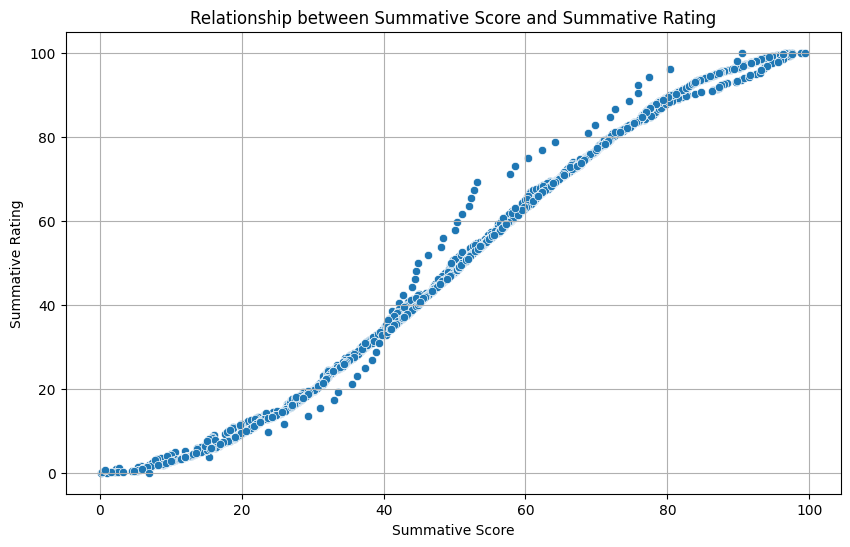

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Let's visualize the relationship between 'Summative Score' and 'Summative Rating'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Summative Score', y='Summative Rating', data=df)
plt.title('Relationship between Summative Score and Summative Rating')
plt.xlabel('Summative Score')
plt.ylabel('Summative Rating')
plt.grid(True)
plt.show()

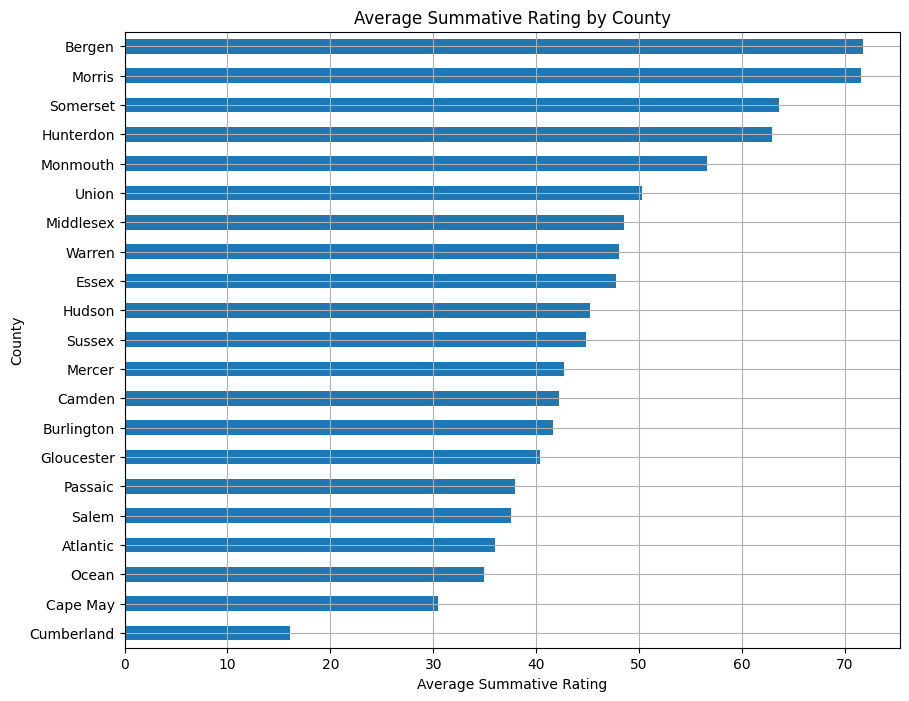

In [69]:
# We might want to look at the average 'Summative Rating' by 'CountyName' to see if there's a geographical trend.
average_rating_by_county = df.groupby('CountyName')['Summative Rating'].mean().sort_values()
plt.figure(figsize=(10, 8))
average_rating_by_county.plot(kind='barh')
plt.title('Average Summative Rating by County')
plt.xlabel('Average Summative Rating')
plt.ylabel('County')
plt.grid(True)
plt.show()

In [70]:
# Count the number of schools and number of districts in each country order in descending

number_of_schools_and_districts = (
    df.groupby('CountyName')
    .agg(number_of_schools=('SchoolName', 'count'), number_of_districts=('DistrictName', 'nunique'))
    .sort_values(by=['number_of_schools', 'number_of_districts'], ascending=False)
)

print(number_of_schools_and_districts)


            number_of_schools  number_of_districts
CountyName                                        
Bergen                    239                   77
Essex                     207                   41
Middlesex                 162                   28
Union                     150                   26
Monmouth                  148                   55
Morris                    130                   40
Passaic                   128                   28
Camden                    126                   43
Hudson                    120                   27
Burlington                101                   39
Ocean                      95                   29
Mercer                     77                   18
Somerset                   75                   20
Gloucester                 67                   27
Atlantic                   60                   26
Cumberland                 44                   19
Hunterdon                  39                   25
Sussex                     37  

In [71]:
# prompt: Bubble graph of the number of schools in each countryname color coded by the average Summative Rating

import plotly.express as px

average_ratings = df.groupby('CountyName')['Summative Rating'].mean().reset_index(name='average_summative_rating')

# Now merge this with your 'number_of_schools_and_districts' DataFrame
df_for_bubble_chart = number_of_schools_and_districts.merge(average_ratings, on='CountyName').reset_index()

# Create the bubble graph

fig = px.scatter(
    df_for_bubble_chart,
    x="CountyName",
    y="number_of_schools",
    size="number_of_districts",
    color="average_summative_rating",  # This line has been updated
    hover_data=["CountyName", "number_of_schools", "number_of_districts", "average_summative_rating"],
    color_continuous_scale=px.colors.sequential.Viridis  # Optional: specify a color scale
)

fig.update_layout(
    title="Number of Schools and Districts in Each County",
    xaxis_title="County Name",
    yaxis_title="Number of Schools",
    coloraxis_colorbar=dict(title="Average Summative Rating")  # Add title to the color bar
)

fig.show()


In [72]:
df.head()

,CountyName,DistrictName,SchoolName,Summative Score,Summative Rating
0,Atlantic,Absecon Public Schools District,Emma C Attales,46.47,42.71
1,Atlantic,Absecon Public Schools District,H Ashton Marsh,37.58,30.17
2,Atlantic,Atlantic City School District,Atlantic City High School,15.25,7.78
3,Atlantic,Atlantic City School District,Sovereign Avenue School,49.90,47.75
4,Atlantic,Atlantic City School District,Chelsea Heights School,53.83,54.05


In [73]:
# Bubble graph of the number of districts in each countyname

fig = px.scatter(
    df_for_bubble_chart,
    x="CountyName",
    y="number_of_districts",
    size="number_of_districts",
    color="number_of_districts",
    hover_data=["CountyName"],
)

fig.update_layout(
    title="Number of Districts in Each County",
    xaxis_title="County Name",
    yaxis_title="Number of Districts",
)

fig.show()


In [92]:
df_for_bubble_chart = number_of_schools_and_districts.merge(average_ratings, on='CountyName').reset_index()

fig = px.scatter(
    df_for_bubble_chart,
    x="CountyName",
    y="number_of_schools",
    size="number_of_districts",
    color="average_summative_rating",  # This line has been updated
    hover_data=["CountyName", "number_of_schools", "number_of_districts", "average_summative_rating"],
    color_continuous_scale=px.colors.sequential.Viridis  # Optional: specify a color scale
)

fig.update_layout(
    title="Number of Schools and Districts in Each County",
    xaxis_title="County Name",
    yaxis_title="Number of Schools",
    coloraxis_colorbar=dict(title="Average Summative Rating")  # Add title to the color bar
)

fig.show()

In [75]:
# Define the weighted_avg function
def weighted_avg(group):
    d = {}
    d['WeightedSummativeScore'] = (group['Summative Score'] * group['number_of_schools']).sum() / group['number_of_schools'].sum()
    return pd.Series(d, index=['WeightedSummativeScore'])

# Calculate the number of schools in each county
school_counts = df.groupby('CountyName')['SchoolName'].nunique().reset_index(name='number_of_schools')

# Merge the school counts back into the original dataframe
df = df.merge(school_counts, on='CountyName')

# Calculate the weighted average 'Summative Score' for each county
weighted_scores = df.groupby('CountyName').apply(weighted_avg).reset_index()

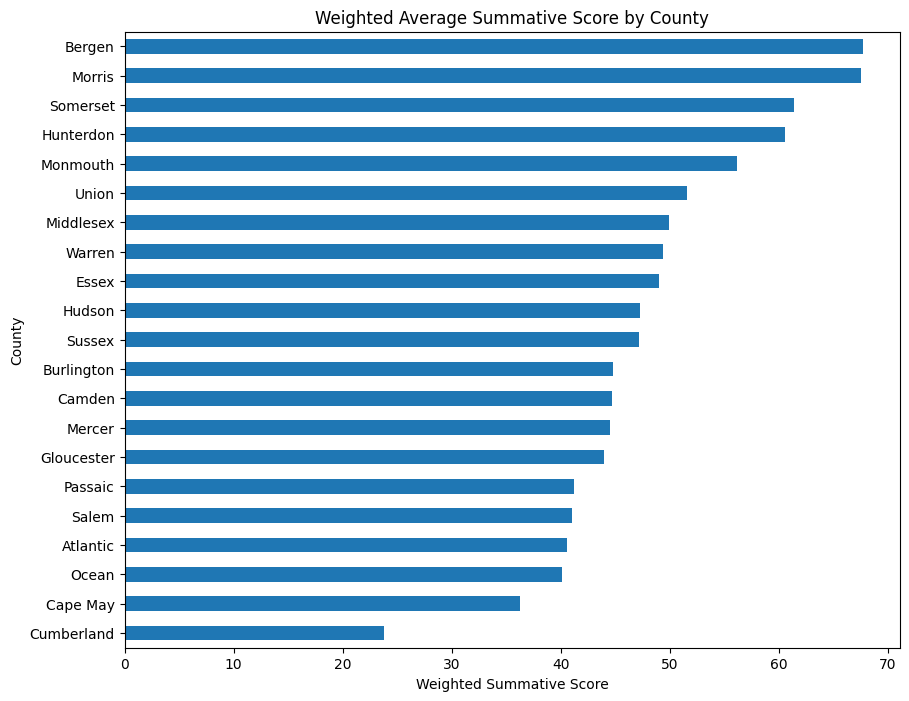

In [76]:
# Plot a bar chart to show the weighted Summative Score for each county.
weighted_scores.set_index('CountyName')['WeightedSummativeScore'].sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Weighted Average Summative Score by County')
plt.xlabel('Weighted Summative Score')
plt.ylabel('County')
plt.show()


In [77]:
# Compare rahway district to the min, max, and quartiles (25%, 50%, and 75%)

rahway_scores = df[df['DistrictName'] == 'Rahway Public School District']['Summative Rating']

min_score = df['Summative Rating'].min()
max_score = df['Summative Rating'].max()
q1 = df['Summative Rating'].quantile(0.25)
q2 = df['Summative Rating'].quantile(0.5)
q3 = df['Summative Rating'].quantile(0.75)

print(f"Rahway District Scores:")
print(f"Min: {rahway_scores.min()}")
print(f"Max: {rahway_scores.max()}")
print(f"Q1: {rahway_scores.quantile(0.25)}")
print(f"Q2: {rahway_scores.quantile(0.5)}")
print(f"Q3: {rahway_scores.quantile(0.75)}")

print(f"\nOverall Scores:")
print(f"Min: {min_score}")
print(f"Max: {max_score}")
print(f"Q1: {q1}")
print(f"Q2: {q2}")
print(f"Q3: {q3}")

Rahway District Scores:
Min: 1.86
Max: 56.21
Q1: 10.7675
Q2: 20.509999999999998
Q3: 38.72

Overall Scores:
Min: 0.0
Max: 100.0
Q1: 24.98
Q2: 50.0
Q3: 75.0


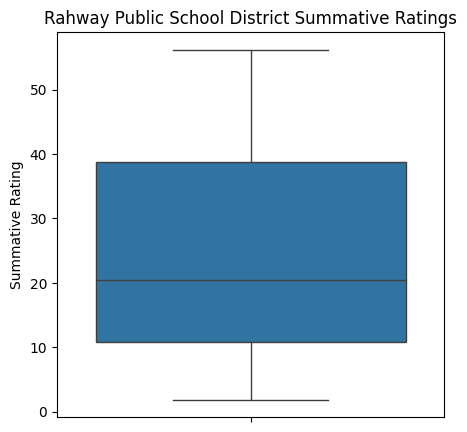

In [78]:

# Boxplot of the Summative Rating for schools in the Rahway Public School District
plt.figure(figsize=(5, 5))
sns.boxplot(y=rahway_scores)
plt.title('Rahway Public School District Summative Ratings')
plt.ylabel('Summative Rating')
plt.show()


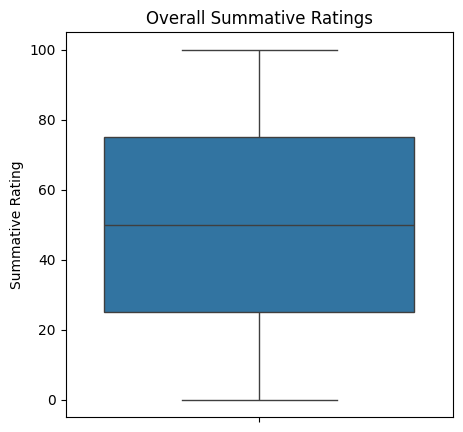

In [79]:
# Boxplot of the Summative Rating for all schools
plt.figure(figsize=(5, 5))
sns.boxplot(y=df['Summative Rating'])
plt.title('Overall Summative Ratings')
plt.ylabel('Summative Rating')
plt.show()


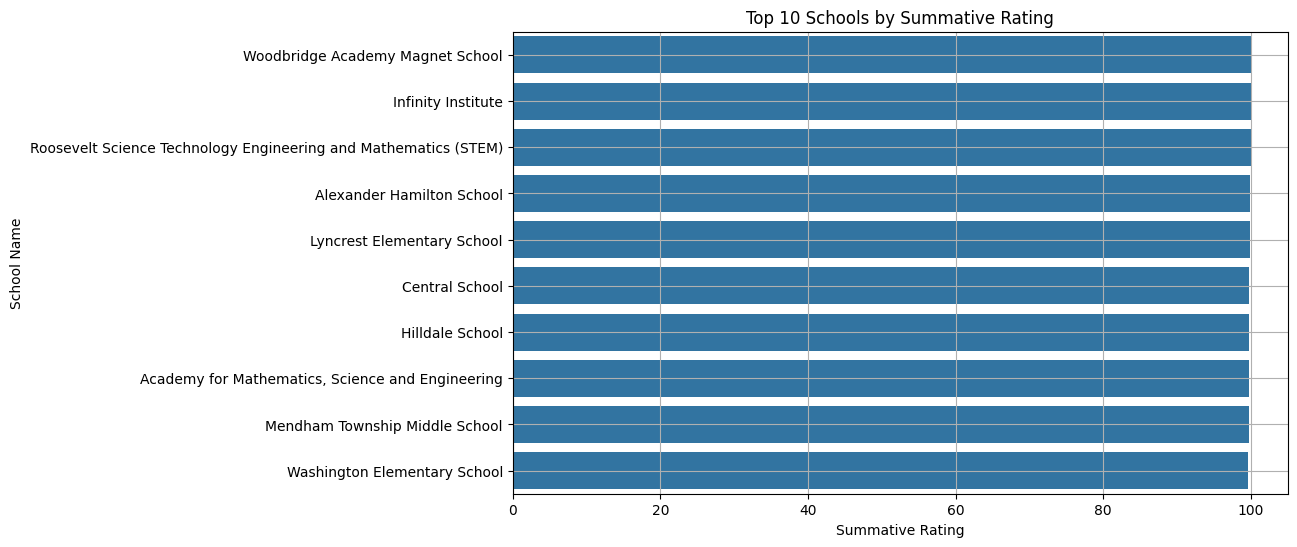

In [80]:
# Bar chart showing the top 20 schools by summative rating

top_10_schools = df.sort_values(by='Summative Rating', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Summative Rating', y='SchoolName', data=top_10_schools)
plt.title('Top 10 Schools by Summative Rating')
plt.xlabel('Summative Rating')
plt.ylabel('School Name')
plt.grid(True)
plt.show()


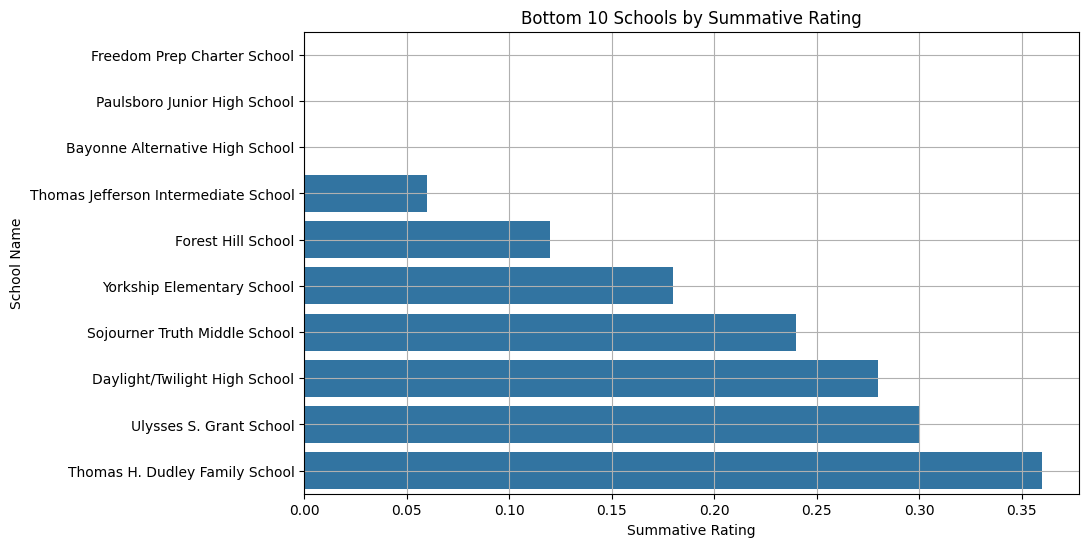

In [81]:
# Bar chart showing the bottom 10 schools by summative rating

bottom_10_schools = df.sort_values(by='Summative Rating').head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Summative Rating', y='SchoolName', data=bottom_10_schools)
plt.title('Bottom 10 Schools by Summative Rating')
plt.xlabel('Summative Rating')
plt.ylabel('School Name')
plt.grid(True)
plt.show()


In [82]:
# Show the counties that are in top_10_schools

top_10_counties = top_10_schools['CountyName'].unique()

print("Counties with schools in the top 10:")
for county in top_10_counties:
    print(county)


Counties with schools in the top 10:
Middlesex
Hudson
Camden
Bergen
Morris
Union


In [83]:
# Show the counties that in the bottom_10_schools

bottom_10_counties = bottom_10_schools['CountyName'].unique()

print("Counties with schools in the bottom 10:")
for county in bottom_10_counties:
  print(county)

Counties with schools in the bottom 10:
Camden
Gloucester
Hudson
Mercer
Essex


In [84]:
# School Name and Summative Rating that is in Rahway Public School District

rahway_schools = df[df['DistrictName'] == 'Rahway Public School District'][['SchoolName', 'Summative Rating']]
print(rahway_schools)


                              SchoolName  Summative Rating
1985                  Rahway High School             11.39
1986      Rahway 7th & 8th Grade Academy              1.86
1987          Franklin Elementary School             56.21
1988  Grover Cleveland Elementary School             41.75
1989           Madison Elementary School             10.56
1990         Roosevelt Elementary School             29.63


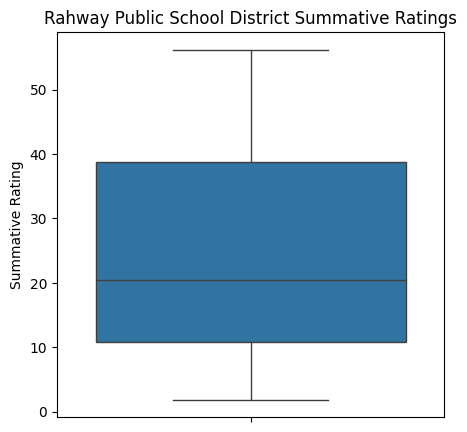

In [85]:
# Box plot of Summative rating for rahway_schools


# Create a boxplot of the Summative Rating for schools in the Rahway Public School District
plt.figure(figsize=(5, 5))
sns.boxplot(y=rahway_schools['Summative Rating'])
plt.title('Rahway Public School District Summative Ratings')
plt.ylabel('Summative Rating')
plt.show()


In [86]:
rahway_schools.describe()

,Summative Rating
count,6.000000
mean,25.233333
std,20.999724
min,1.860000
25%,10.767500
50%,20.510000
75%,38.720000
max,56.210000


In [87]:
# Calculate the IQR for Rahway schools
rahway_iqr = rahway_schools['Summative Rating'].quantile(0.75) - rahway_schools['Summative Rating'].quantile(0.25)

print(f"IQR for Rahway schools: {rahway_iqr}")


IQR for Rahway schools: 27.9525


In [88]:
# Calculate the cutoffs for upper and lower bound concerning Rahway School Summative Ratings

q1 = rahway_schools['Summative Rating'].quantile(0.25)
q3 = rahway_schools['Summative Rating'].quantile(0.75)
rahway_iqr = q3 - q1

# Cutoff for outliers
lower_bound = q1 - 1.5 * rahway_iqr
upper_bound = q3 + 1.5 * rahway_iqr

print(f"Lower Bound Cutoff: {lower_bound}, Upper Bound Cutoff: {upper_bound}")

Lower Bound Cutoff: -31.161250000000003, Upper Bound Cutoff: 80.64875


In [89]:
# A closer look at the Summative Ratings for Rahway Schools
rahway_rating_mean = rahway_schools['Summative Rating'].mean()
rahway_rating_median = rahway_schools['Summative Rating'].quantile(.50)

print(f'Summative Rating Mean: {rahway_rating_mean}, Summative Rating Median: {rahway_rating_median}')

Summative Rating Mean: 25.233333333333334, Summative Rating Median: 20.509999999999998


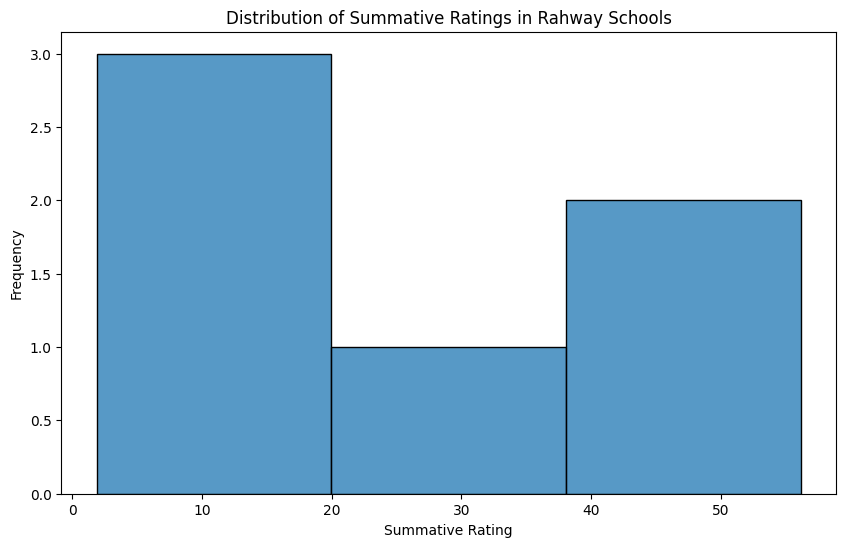

In [90]:
# Histogram of summative rating in rahway_schools


plt.figure(figsize=(10, 6))
sns.histplot(data=rahway_schools, x='Summative Rating', bins=3)
plt.title('Distribution of Summative Ratings in Rahway Schools')
plt.xlabel('Summative Rating')
plt.ylabel('Frequency')
plt.show()


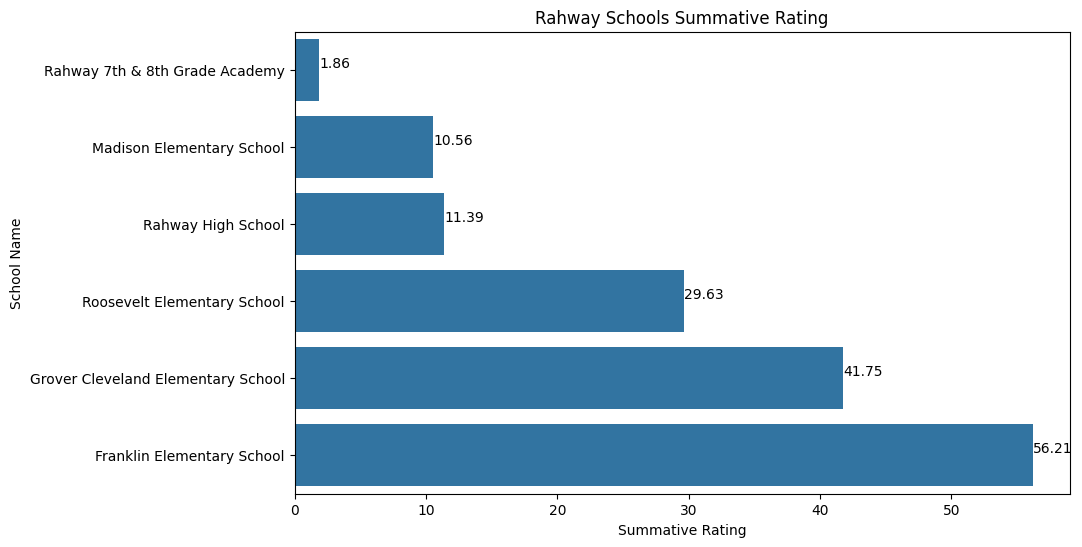

In [91]:
# Bar graph of rahway_schools with sorted values with the bars going horizontal and the rating included in the graph

# A new DataFrame with the sorted values
rahway_schools_sorted = rahway_schools.sort_values(by='Summative Rating', ascending=True)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Summative Rating', y='SchoolName', data=rahway_schools_sorted)

# Add the rating labels
for i, row in rahway_schools_sorted.iterrows():
    plt.text(row['Summative Rating'], row['SchoolName'], str(row['Summative Rating']), ha='left', va='bottom')

# Set the title and labels
plt.title('Rahway Schools Summative Rating')
plt.xlabel('Summative Rating')
plt.ylabel('School Name')

# Show the plot
plt.show()
